In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('cp-for-task.xlsx')

# Search Throw data
df.describe()

,Mobile Key,Person Birth Date,FirstAppInstallDate,Mobile Operator Id,Mobile SimCard Type Id,IsMerchant,TotalTrsApplication,TotalAmount,FirstTrsDate,LastTrsDate,...,CountChargeasDest,SuccessfullRatio,SuccessfullRatioExcC2C,AppErrorRatio,UserErrorRatio,BalanceErrorRatio,PaymentToolCardRatio,PaymentToolWalletRatio,PaymentToolTaliRatio,CMS_Balance
count,50000.000000,15579,50000,50000.000000,49597.000000,50000.0,20285.000000,2.028500e+04,2.028500e+04,2.028500e+04,...,13016.000000,21461.000000,19663.000000,21461.000000,21461.000000,21461.000000,20285.000000,20285.000000,20285.000000,9.340000e+03
mean,63710.034500,1982-11-14 14:31:21.455805824,2018-12-13 03:26:28.597302016,1.354580,1.263705,0.0,112.099482,4.733102e+08,1.401112e+07,1.401775e+07,...,13.752535,0.748779,0.769655,0.072712,0.035646,0.018635,0.937021,0.062040,0.000938,2.069254e+05
min,2.000000,1926-09-24 00:00:00,2014-12-01 21:45:03.027000,1.000000,1.000000,0.0,1.000000,0.000000e+00,1.401010e+07,1.401010e+07,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,33096.750000,1977-03-13 00:00:00,2017-08-08 22:13:58.562500096,1.000000,1.000000,0.0,6.000000,4.000000e+06,1.401010e+07,1.401121e+07,...,1.000000,0.680161,0.685714,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00
50%,64329.000000,1984-10-22 00:00:00,2018-09-11 15:00:31.040000,1.000000,1.000000,0.0,41.000000,6.428000e+07,1.401013e+07,1.402042e+07,...,4.000000,0.830097,0.854838,0.015873,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00
75%,95063.250000,1990-01-29 00:00:00,2020-08-16 08:26:59.817250048,2.000000,2.000000,0.0,153.000000,5.517271e+08,1.401061e+07,1.402050e+07,...,15.000000,0.910931,0.958333,0.065476,0.018587,0.008064,1.000000,0.000000,0.000000,9.500000e+04
max,125074.000000,2012-05-04 00:00:00,2023-07-24 17:37:55.923000,2.000000,2.000000,0.0,2548.000000,2.452428e+10,1.402050e+07,1.402050e+07,...,518.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.558500e+07
std,36134.249738,NaN,NaN,0.478391,0.440646,0.0,170.979340,9.501309e+08,2.722882e+03,4.333718e+03,...,24.940581,0.256221,0.261442,0.159385,0.114702,0.072512,0.201744,0.200534,0.021943,9.211199e+05


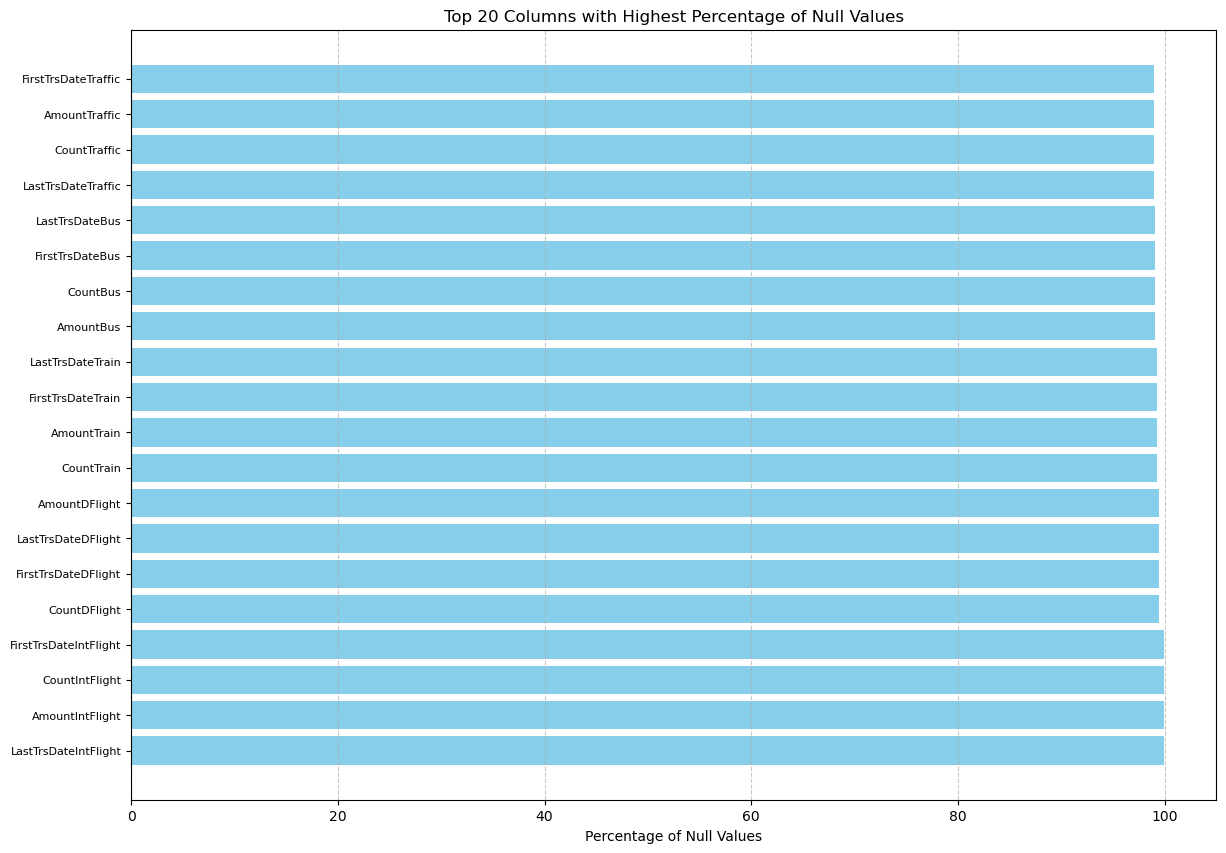

In [2]:
# Get the number of null values in each column
null_counts = df.isnull().sum()

# Get the percentage of null values in each column
null_percentage = (null_counts / len(df)) * 100

# Create a DataFrame for better readability
null_percentage_df = pd.DataFrame(null_percentage, columns=['Percentage of Null Values'])

# Sort the DataFrame by percentage of null values for better visualization
null_percentage_df = null_percentage_df.sort_values(by='Percentage of Null Values', ascending=False)

# Display only the top N columns with the highest percentages of null values
top_n = 20  # Change this number as needed
top_null_percentage_df = null_percentage_df.head(top_n)

# Plot the percentages of null values
plt.figure(figsize=(14, 10))
plt.barh(top_null_percentage_df.index, top_null_percentage_df['Percentage of Null Values'], color='skyblue')
plt.xlabel('Percentage of Null Values')
plt.title(f'Top {top_n} Columns with Highest Percentage of Null Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0, fontsize=8)
plt.show()

In [3]:
# # Columns to drop
# columns_to_drop = ['Person Is Alive', 'Person Birth Date', 'Person Gender Title', 
#                    'Person First Name', 'Person Last Name', 'Mobile Number Encrypt', 
#                    'Mobile Number Masked', 'Mobile Device OS Title', 'Mobile Device Model', 
#                    'Mobile Device Brand', 'IsMerchant', 'Person Birth Date']


# # Drop the specified columns
# df = df.drop(columns=columns_to_drop)

# df.head()


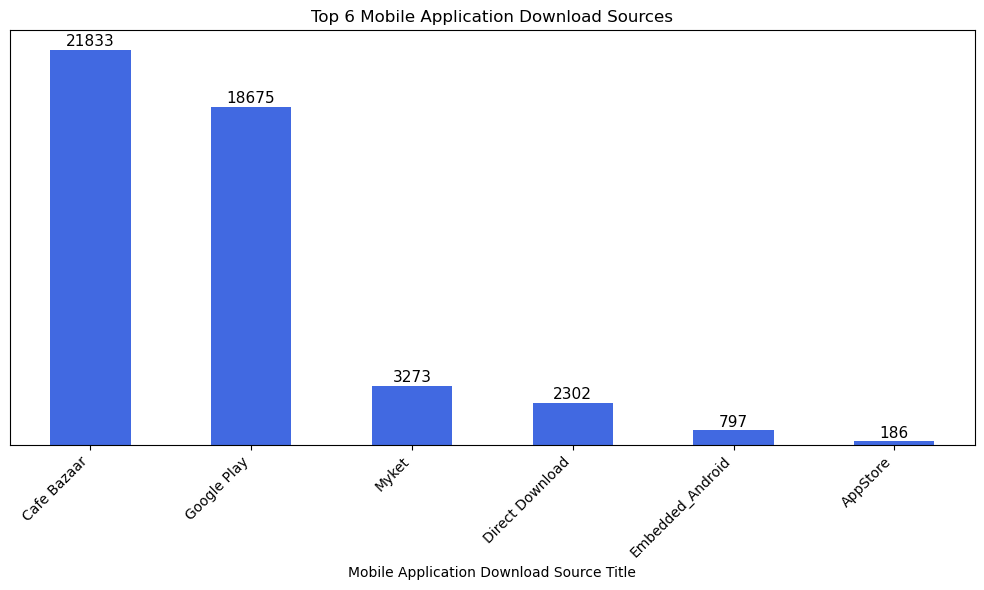

In [4]:
# Filter data for Mobile Operator Id 1 and 2
df_filtered = df[df['Mobile Operator Id'].isin([1, 2])]

# Get the top 6 application download source
top_6_downloads = (df_filtered['Mobile Application Download Source Title']
                    .dropna()
                    .value_counts()
                    .head(6))

# Create the first chart
plt.figure(figsize=(10, 6))
bars = top_6_downloads.plot(kind='bar', color='royalblue')

# Remove grid lines and y-axis labels
plt.grid(axis='y', linestyle='none', which='both', markevery=None)
plt.ylabel('')
plt.yticks([])  # Remove y-axis numbers

# Annotate bar values inside the bars
for bar in bars.patches:
    bar.set_height(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, int(bar.get_height()), ha='center', va='bottom', fontsize=11)

# Set x-axis labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mobile Application Download Source Title')
plt.title('Top 6 Mobile Application Download Sources')

plt.tight_layout()
plt.show()

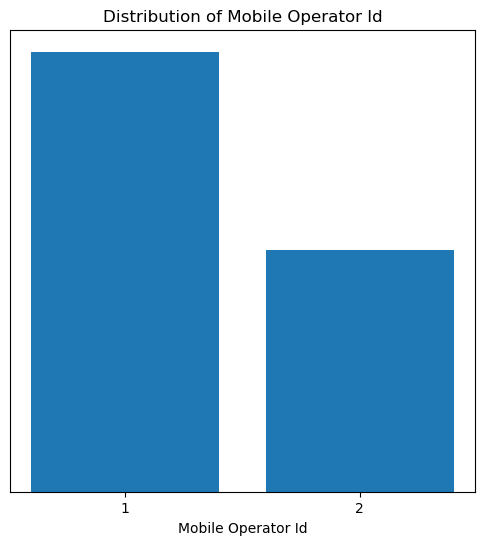

In [5]:
# 2. Mobile Operator Id distribution (with labels 1 and 2)
operator_counts = df['Mobile Operator Id'].value_counts()

plt.figure(figsize=(6, 6))
plt.bar(operator_counts.index, operator_counts.values)  # Use bar chart for clear x-axis labels

# Set custom x-axis labels
plt.xticks(operator_counts.index, [str(x) for x in operator_counts.index])  # Convert index to strings

plt.xlabel('Mobile Operator Id')
plt.ylabel('')  # Remove y-axis labels
plt.yticks([])  # Remove y-axis numbers
plt.title('Distribution of Mobile Operator Id')
plt.grid(axis='y', linestyle='none', which='both', markevery=None)
plt.show()

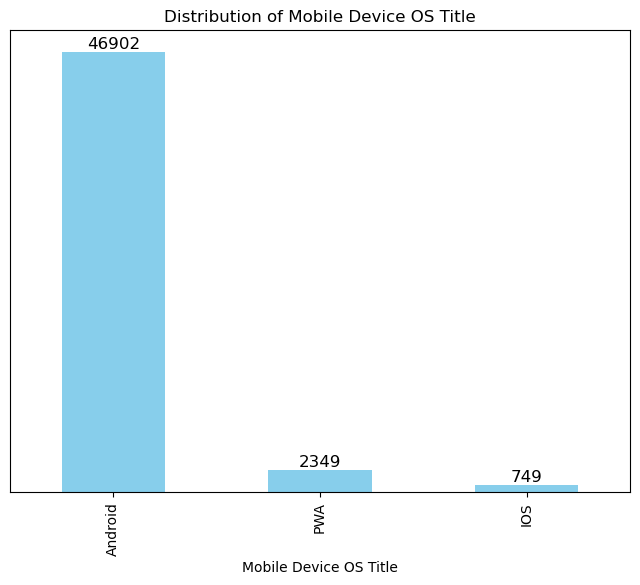

In [6]:
# 3. Mobile Device OS Title (Count with numbers within bars)
os_counts = df['Mobile Device OS Title'].value_counts()

plt.figure(figsize=(8, 6))
os_counts.plot(kind='bar', color='skyblue')

# Add labels with counts above each bar
for index, value in enumerate(os_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

plt.xlabel('Mobile Device OS Title')
plt.ylabel('')  # Remove y-axis labels
plt.yticks([])  # Remove y-axis numbers
plt.title('Distribution of Mobile Device OS Title')
plt.grid(axis='y', linestyle='none', which='both', markevery=None)
plt.show()

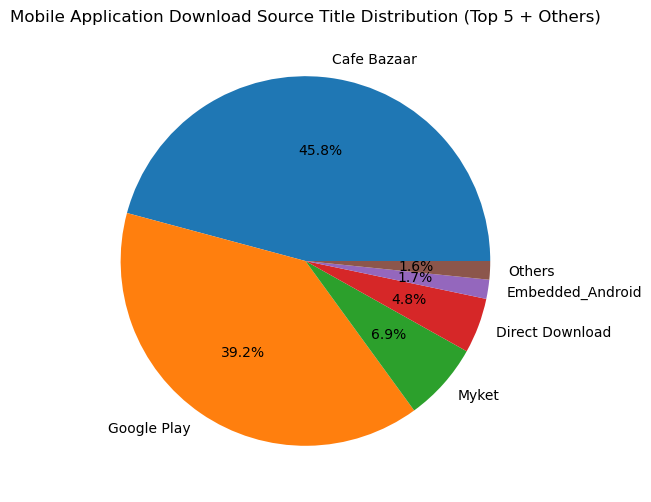

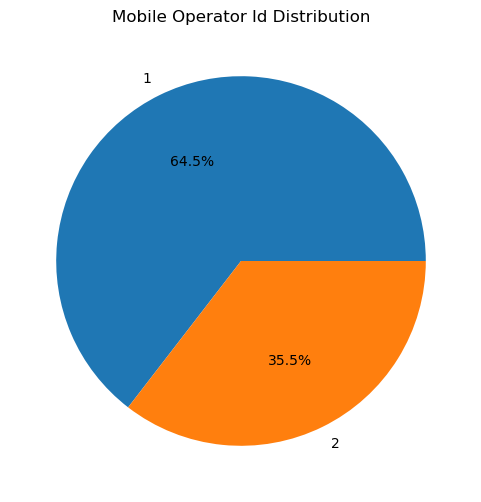

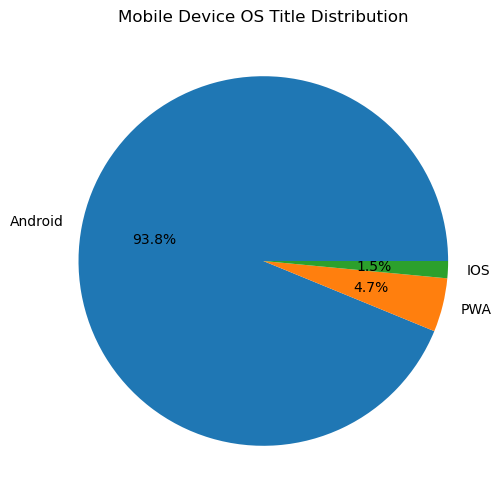

In [7]:
# 1. Mobile Application Download Source Title
source_counts = df['Mobile Application Download Source Title'].value_counts()
top_5_sources = source_counts.head(5)
other_count = source_counts[5:].sum()

# Use pd.concat to combine Series
source_counts = pd.concat([top_5_sources, pd.Series({'Others': other_count})])

plt.figure(figsize=(8, 6))
plt.pie(source_counts, labels=source_counts.index, autopct="%1.1f%%")
plt.title("Mobile Application Download Source Title Distribution (Top 5 + Others)")
plt.show()

# 2. Mobile Operator Id (Exact Count)
operator_counts = df['Mobile Operator Id'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(operator_counts, labels=operator_counts.index, autopct="%1.1f%%")
plt.title("Mobile Operator Id Distribution")
plt.show()

# 3. Mobile Device OS Title (Count)
os_counts = df['Mobile Device OS Title'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(os_counts, labels=os_counts.index, autopct="%1.1f%%")
plt.title("Mobile Device OS Title Distribution")
plt.show()


In [8]:
# from bidi.algorithm import get_display
# from arabic_reshaper import reshape


# # Split comma-separated values and expand to DataFrame
# exploded = df['UserOwnedBanks'].str.split(',', expand=True)

# # Count occurrences of each unique value
# value_counts = exploded.stack().str.strip().value_counts().reset_index(name='count')
# value_counts.columns = ['bank', 'count']

# # Sort by count in descending order (top 10)
# top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# # Reshape and display Persian text correctly
# persian_labels = [get_display(reshape(label)) for label in top_10_counts['bank']]

# # Create a horizontal bar chart
# plt.figure(figsize=(10, 6))
# plt.barh(persian_labels, top_10_counts['count'], color='skyblue')
# plt.xlabel('Count')
# plt.ylabel('Bank')
# plt.title('Top 10 Banks by Count')
# plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top
# plt.grid(axis='x', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

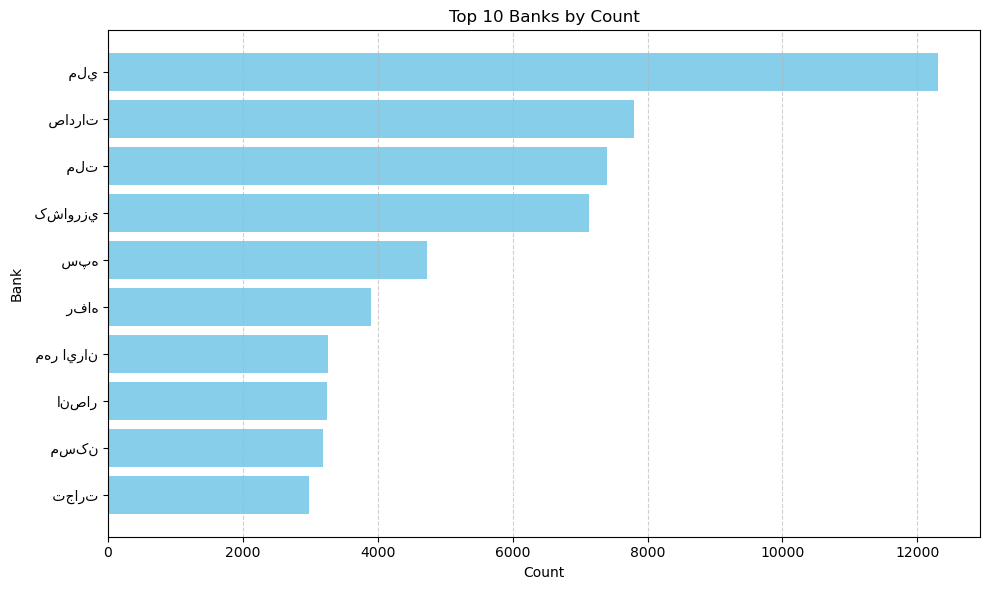

In [9]:
# Split comma-separated values and expand to DataFrame
exploded = df['UserOwnedBanks'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['bank', 'count']


# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_counts['bank'], top_10_counts['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Bank')
plt.title('Top 10 Banks by Count')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

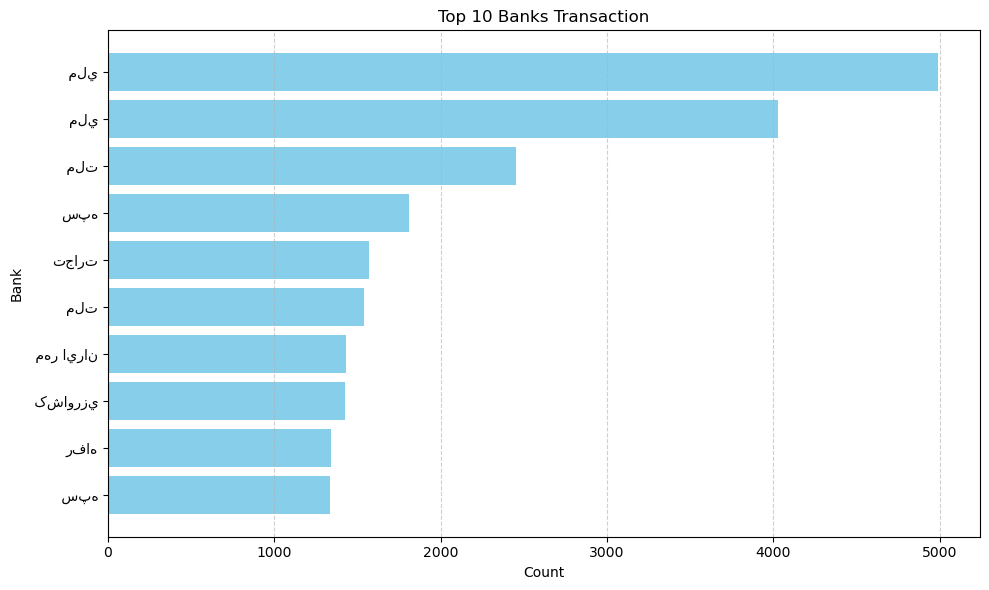

In [10]:
# Split comma-separated values and expand to DataFrame
exploded = df['BankswithTrs'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['bank', 'count']


# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_counts['bank'], top_10_counts['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Bank')
plt.title('Top 10 Banks Transaction')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

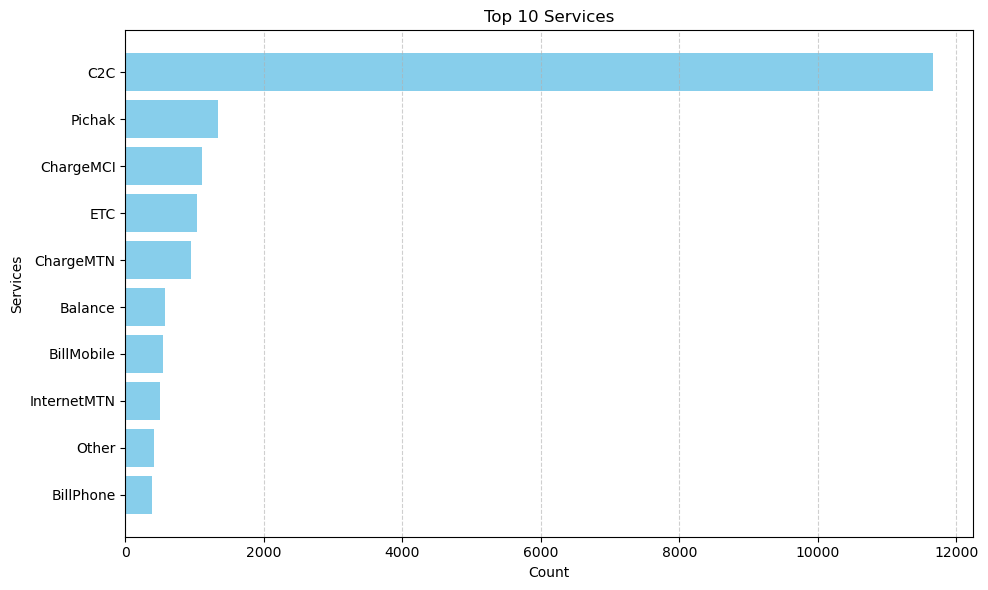

In [11]:
# Split comma-separated values and expand to DataFrame
exploded = df['TopService'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['Services', 'count']


# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_counts['Services'], top_10_counts['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Services')
plt.title('Top 10 Services')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

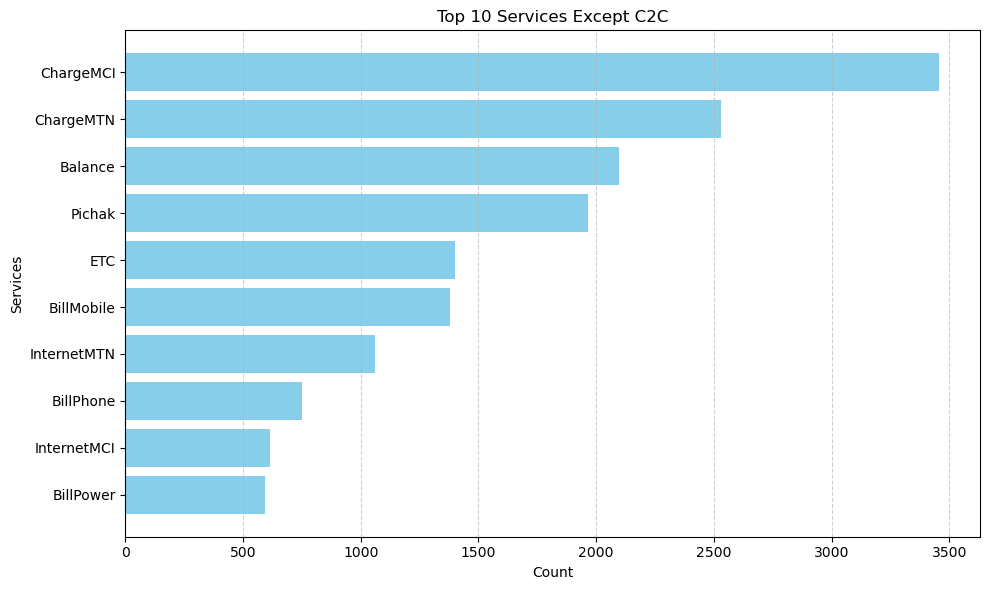

In [12]:
# Split comma-separated values and expand to DataFrame
exploded = df['TopServiceExC2C'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['Services', 'count']


# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_counts['Services'], top_10_counts['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Services')
plt.title('Top 10 Services Except C2C')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

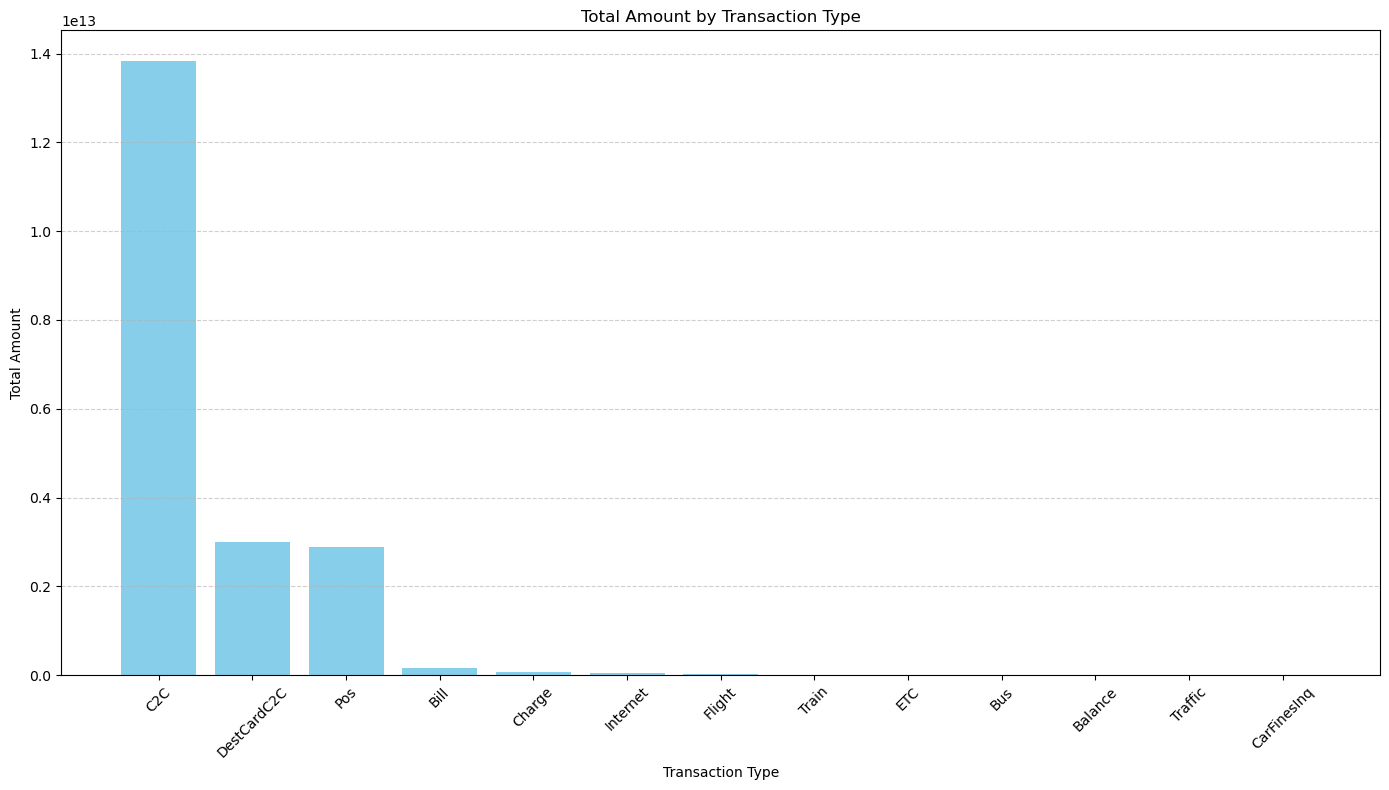

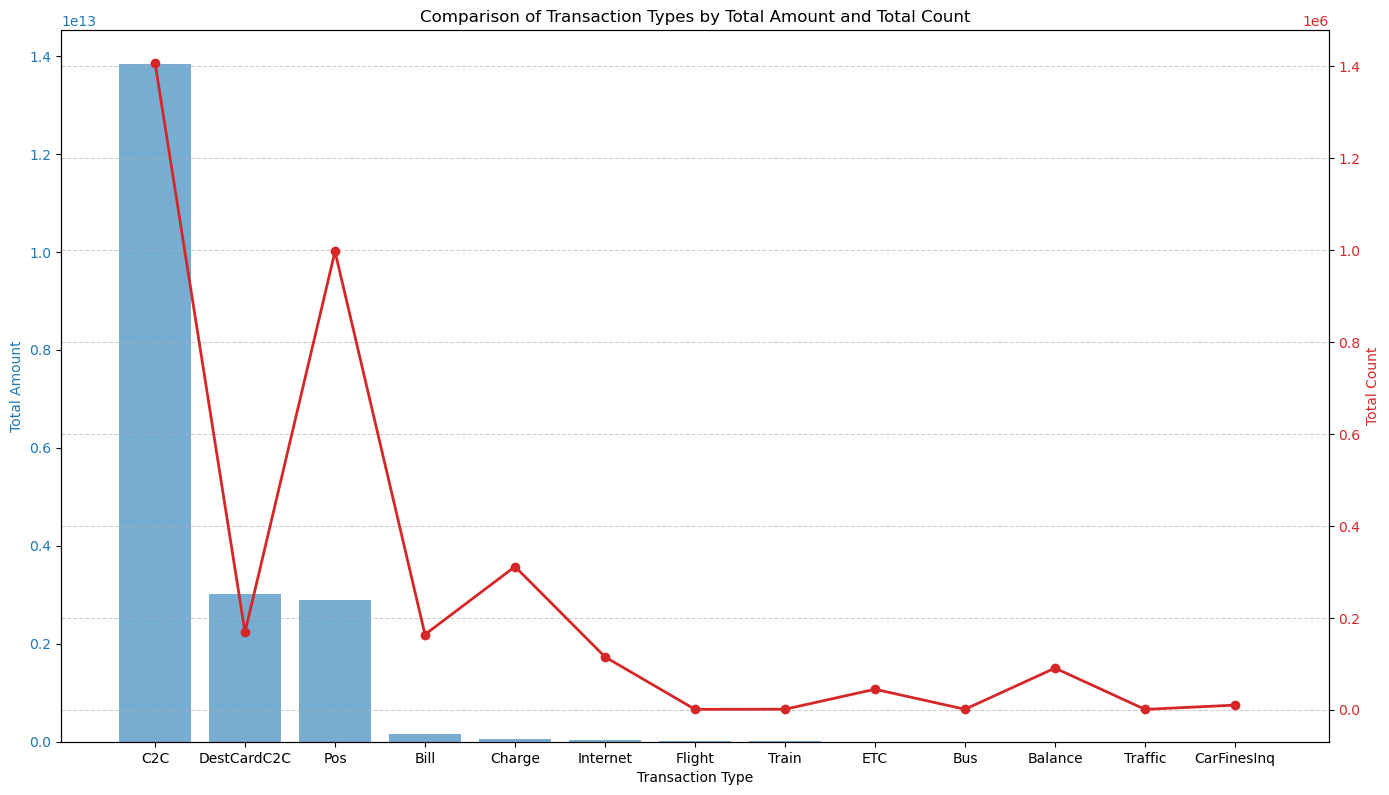

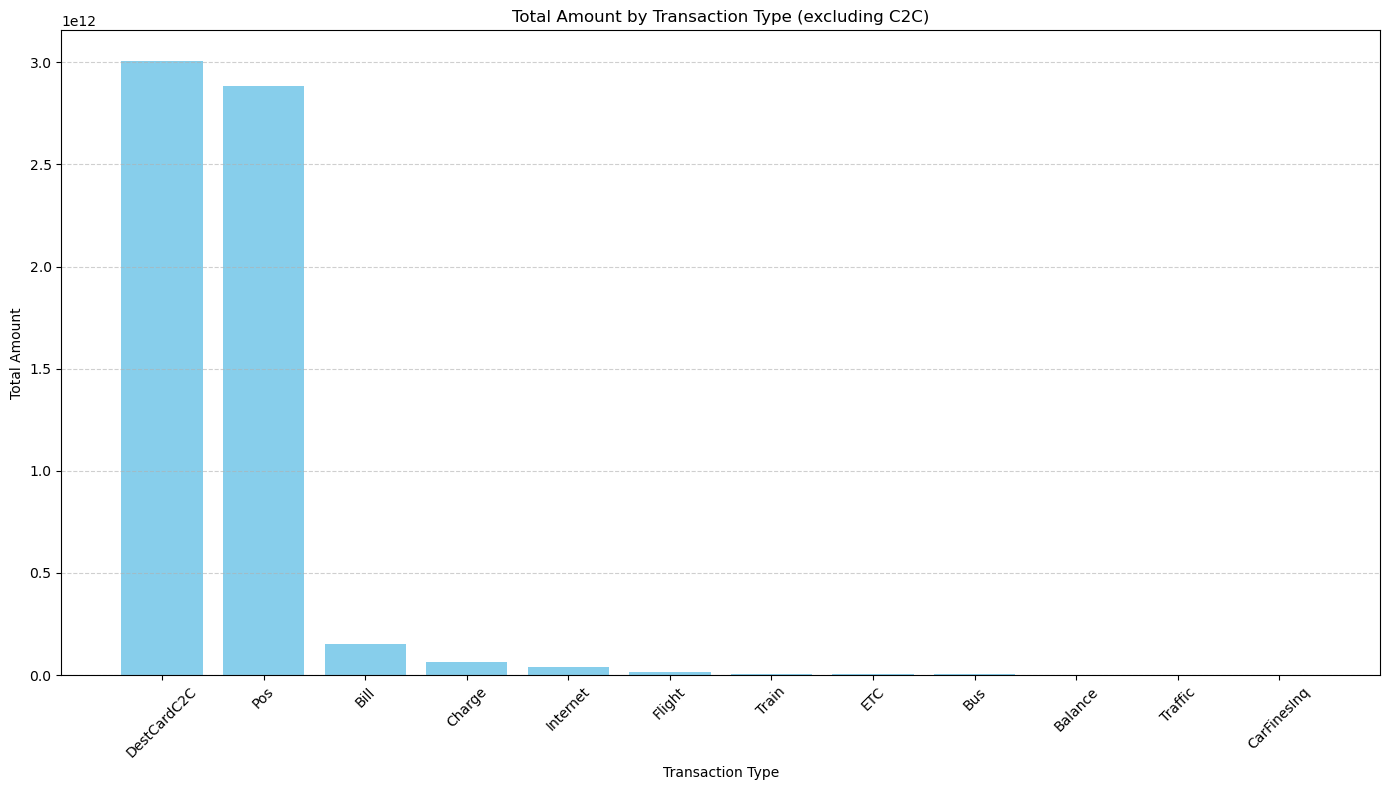

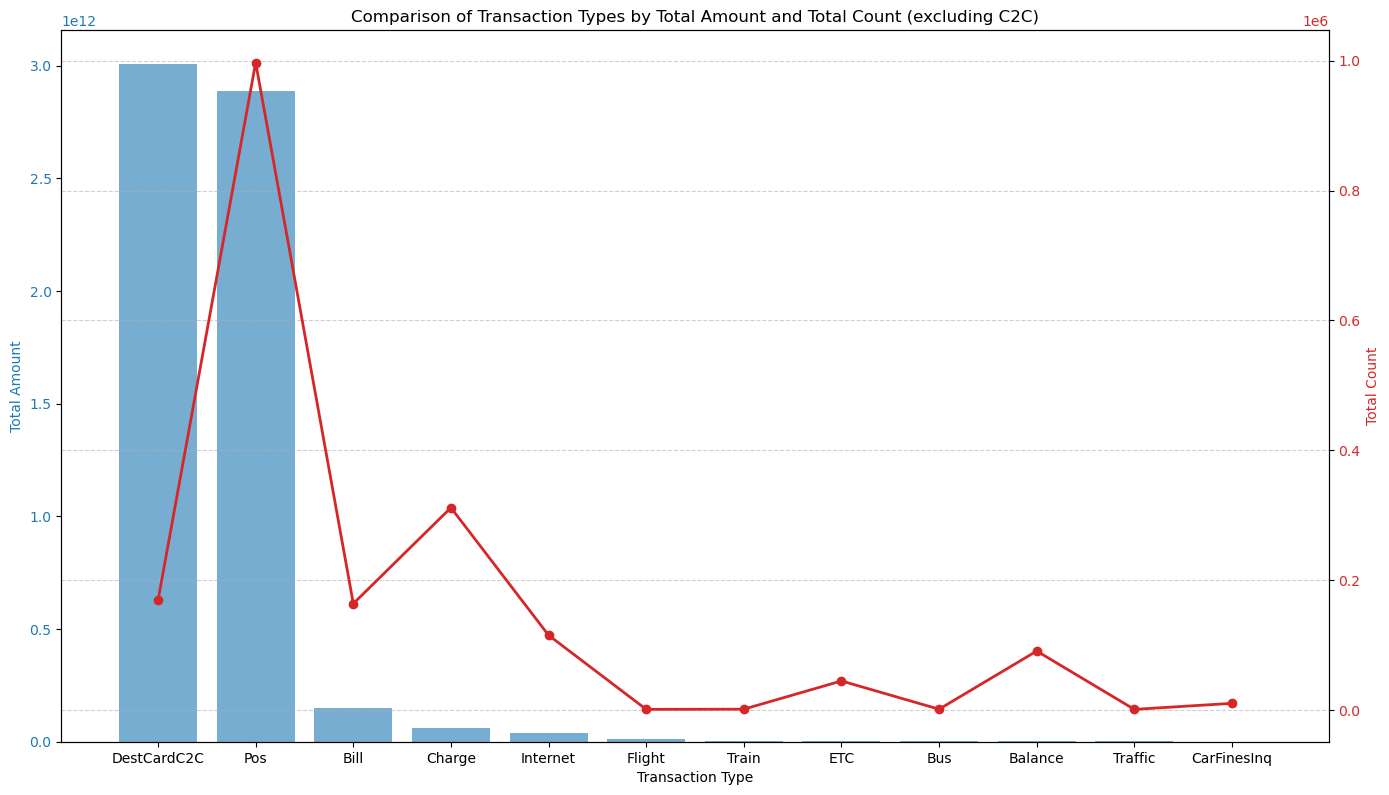

In [15]:
# List of columns for comparison
transaction_types = {
    'Pos': ['TotalTrsPos', 'TotalAmountPos'],
    'C2C': ['CountC2C', 'AmountC2C'],
    'Balance': ['CountBalance', 'CMS_Balance'],
    'Pichak': ['CountPichak', 'TotalAmountPichak'],
    'Charge': ['CountCharge', 'AmountCharge'],
    'Internet': ['CountInternet', 'AmountInternet'],
    'Bill': ['CountBill', 'AmountBill'],
    'ETC': ['CountETC', 'AmountETC'],
    'CarFinesInq': ['CountCarFinesInq', 'AmountCarFinesInq'],
    'Traffic': ['CountTraffic', 'AmountTraffic'],
    'Flight': ['CountDFlight', 'AmountDFlight'],
    'Train': ['CountTrain', 'AmountTrain'],
    'Bus': ['CountBus', 'AmountBus'],
    'DestCardC2C': ['CountDestCardC2C', 'AmountC2CasDest']
}

# Aggregate data
summary = {
    'Transaction Type': [],
    'Total Amount': [],
    'Total Count': []
}

for transaction, columns in transaction_types.items():
    count_col, amount_col = columns
    if count_col in df.columns and amount_col in df.columns:
        summary['Transaction Type'].append(transaction)
        summary['Total Amount'].append(df[amount_col].sum())
        summary['Total Count'].append(df[count_col].sum())

summary_df = pd.DataFrame(summary)

# Order by total amount
summary_df = summary_df.sort_values(by='Total Amount', ascending=False)

# Plot 1: Bar plot for Total Amount
plt.figure(figsize=(14, 8))
plt.bar(summary_df['Transaction Type'], summary_df['Total Amount'], color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.title('Total Amount by Transaction Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 2: Combined Bar and Line plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot total amount
color = 'tab:blue'
ax1.set_xlabel('Transaction Type')
ax1.set_ylabel('Total Amount', color=color)
ax1.bar(summary_df['Transaction Type'], summary_df['Total Amount'], color=color, alpha=0.6, label='Total Amount')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis to plot total count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Count', color=color)
ax2.plot(summary_df['Transaction Type'], summary_df['Total Count'], color=color, marker='o', linestyle='-', linewidth=2, label='Total Count')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Comparison of Transaction Types by Total Amount and Total Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Exclude 'C2C' and plot again
summary_df_excl_c2c = summary_df[summary_df['Transaction Type'] != 'C2C']

# Plot 3: Bar plot for Total Amount excluding C2C
plt.figure(figsize=(14, 8))
plt.bar(summary_df_excl_c2c['Transaction Type'], summary_df_excl_c2c['Total Amount'], color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.title('Total Amount by Transaction Type (excluding C2C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 4: Combined Bar and Line plot excluding C2C
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot total amount
color = 'tab:blue'
ax1.set_xlabel('Transaction Type')
ax1.set_ylabel('Total Amount', color=color)
ax1.bar(summary_df_excl_c2c['Transaction Type'], summary_df_excl_c2c['Total Amount'], color=color, alpha=0.6, label='Total Amount')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis to plot total count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Count', color=color)
ax2.plot(summary_df_excl_c2c['Transaction Type'], summary_df_excl_c2c['Total Count'], color=color, marker='o', linestyle='-', linewidth=2, label='Total Count')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Comparison of Transaction Types by Total Amount and Total Count (excluding C2C)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [16]:
# Convert date columns to datetime
df['FirstTrsDate'] = pd.to_datetime(df['FirstTrsDate'])
df['LastTrsDate'] = pd.to_datetime(df['LastTrsDate'])

# Calculate Recency (days since last transaction)
current_date = pd.to_datetime('2024-08-03')
df['Recency'] = (current_date - df['LastTrsDate']).dt.days

# Calculate Frequency (total number of transactions)
frequency_columns = [
    'TotalTrsPos', 'CountC2C', 'CountBalance', 'CountPichak', 'CountCharge',
    'CountInternet', 'CountBill', 'CountETC', 'CountCarFinesInq', 'CountTraffic',
    'CountDFlight', 'CountTrain', 'CountBus', 'CountDestCardC2C'
]

df['Frequency'] = df[frequency_columns].sum(axis=1)

# Calculate Monetary (total amount spent)
monetary_columns = [
    'TotalAmountPos', 'AmountC2C', 'CMS_Balance', 'AmountCharge',
    'AmountInternet', 'AmountBill', 'AmountETC', 'AmountCarFinesInq', 'AmountTraffic',
    'AmountDFlight', 'AmountTrain', 'AmountBus', 'AmountC2CasDest'
]

df['Monetary'] = df[monetary_columns].sum(axis=1)

# Define churn: Recency > 90 days
df['Churn'] = df['Recency'] > 90

# RFM Segmentation
quantiles = df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

def rfm_segmentation(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

df['R'] = df['Recency'].apply(rfm_segmentation, args=('Recency', quantiles))
df['F'] = df['Frequency'].apply(rfm_segmentation, args=('Frequency', quantiles))
df['M'] = df['Monetary'].apply(rfm_segmentation, args=('Monetary', quantiles))

df['RFM_Score'] = df[['R', 'F', 'M']].sum(axis=1)

# Assign RFM segment labels
df['RFM_Segment'] = (
    df['R'].astype(str) +
    df['F'].astype(str) +
    df['M'].astype(str)
)

# Display the RFM table
df[['Mobile Key', 'Recency', 'Frequency', 'Monetary', 'Churn', 'R', 'F', 'M', 'RFM_Score', 'RFM_Segment']]

,Mobile Key,Recency,Frequency,Monetary,Churn,R,F,M,RFM_Score,RFM_Segment
0,2,945,18.0,8.218450e+06,True,1,3,3,7,133
1,4,945,0.0,0.000000e+00,True,1,1,1,3,111
2,6,945,0.0,0.000000e+00,True,1,1,1,3,111
3,7,945,363.0,3.020366e+09,True,1,4,4,9,144
4,9,945,332.0,4.356969e+09,True,1,4,4,9,144
...,...,...,...,...,...,...,...,...,...,...
49995,125060,945,0.0,0.000000e+00,True,1,1,1,3,111
49996,125068,945,109.0,6.551433e+08,True,1,4,4,9,144
49997,125071,945,0.0,0.000000e+00,True,1,1,1,3,111
49998,125072,945,0.0,0.000000e+00,True,1,1,1,3,111


In [18]:
# Convert date columns to datetime
df['FirstTrsDate'] = pd.to_datetime(df['FirstTrsDate'])
df['LastTrsDate'] = pd.to_datetime(df['LastTrsDate'])

# Set current_date to the last date in the dataset
current_date = df['LastTrsDate'].max()

# Calculate Recency (days since last transaction)
df['Recency'] = (current_date - df['LastTrsDate']).dt.days

# Calculate Frequency (total number of transactions)
frequency_columns = [
    'TotalTrsPos', 'CountC2C', 'CountBalance', 'CountPichak', 'CountCharge',
    'CountInternet', 'CountBill', 'CountETC', 'CountCarFinesInq', 'CountTraffic',
    'CountDFlight', 'CountTrain', 'CountBus', 'CountDestCardC2C'
]

df['Frequency'] = df[frequency_columns].sum(axis=1)

# Calculate Monetary (total amount spent)
monetary_columns = [
    'TotalAmountPos', 'AmountC2C', 'CMS_Balance', 'AmountCharge',
    'AmountInternet', 'AmountBill', 'AmountETC', 'AmountCarFinesInq', 'AmountTraffic',
    'AmountDFlight', 'AmountTrain', 'AmountBus', 'AmountC2CasDest'
]

df['Monetary'] = df[monetary_columns].sum(axis=1)

# Calculate days active for each user
df['Days_Active'] = (df['LastTrsDate'] - df['FirstTrsDate']).dt.days + 1

# Define churn: Recency > 90 days
churn_threshold = 90
df['Churn'] = df['Recency'] > churn_threshold

# Calculate average value of users (Monetary)
average_value_of_users = df['Monetary'].mean()
print(f"Average Value of Users: {average_value_of_users:.2f} - This is the average amount spent by each user.")

# Calculate average value (Monetary)
average_value = df['Monetary'].mean()
print(f"Average Value: {average_value:.2f} - This is the same as the average value of users.")

# Calculate user share
total_users = len(df)
total_active_users = df[~df['Churn']].shape[0]
user_share = total_active_users / total_users * 100
print(f"User Share: {user_share:.2f}% - Percentage of active users (users who are not churned).")

# Calculate income (profit) share - Assuming 'profit' is 'Monetary'
total_income = df['Monetary'].sum()
income_share = total_income / total_income * 100  # Always 100% if calculating share of total income
print(f"Income (Profit) Share: {income_share:.2f}% - This is the share of total income, which is always 100%.")

# Calculate average use of the app (total transactions)
average_use_app = df['Frequency'].mean()
print(f"Average Use of App: {average_use_app:.2f} - Average number of transactions per user.")

# Calculate average use of the app per day (frequency)
df['Frequency_Per_Day'] = df['Frequency'] / df['Days_Active']
average_use_app_per_day = df['Frequency_Per_Day'].mean()
print(f"Average Use of App per Day: {average_use_app_per_day:.2f} - Average number of transactions per user per day.")

# Calculate average user use of the app
average_user_use_app = df['Frequency'].mean()
print(f"Average User Use of App: {average_user_use_app:.2f} - Same as the average use of app.")

# Calculate churn rate
churn_rate = df['Churn'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}% - Percentage of users who have not used the app in the last {churn_threshold} days.")

Average Value of Users: 400133482.15 - This is the average amount spent by each user.
Average Value: 400133482.15 - This is the same as the average value of users.
User Share: 100.00% - Percentage of active users (users who are not churned).
Income (Profit) Share: 100.00% - This is the share of total income, which is always 100%.
Average Use of App: 67.61 - Average number of transactions per user.
Average Use of App per Day: 67.61 - Average number of transactions per user per day.
Average User Use of App: 67.61 - Same as the average use of app.
Churn Rate: 0.00% - Percentage of users who have not used the app in the last 90 days.


In [19]:
# Set current_date to the last date in the dataset
current_date = df['LastTrsDate'].max()

# Calculate Recency (days since last transaction)
df['Recency'] = (current_date - df['LastTrsDate']).dt.days

# Define churn: Recency > 30 days
churn_threshold = 30
df['Churn'] = df['Recency'] > churn_threshold

# Calculate churn rate
churn_rate = df['Churn'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}% - Percentage of users who have not used the app in the last {churn_threshold} days.")

Churn Rate: 0.00% - Percentage of users who have not used the app in the last 30 days.


In [21]:
# Convert date columns to datetime
df['FirstTrsDate'] = pd.to_datetime(df['FirstTrsDate'])
df['LastTrsDate'] = pd.to_datetime(df['LastTrsDate'])

# Set current_date to the last date in the dataset
current_date = df['LastTrsDate'].max()

# Calculate Recency (days since last transaction)
df['Recency'] = (current_date - df['LastTrsDate']).dt.days

# Calculate Frequency (total number of transactions)
frequency_columns = [
    'TotalTrsPos', 'CountC2C', 'CountBalance', 'CountPichak', 'CountCharge',
    'CountInternet', 'CountBill', 'CountETC', 'CountCarFinesInq', 'CountTraffic',
    'CountDFlight', 'CountTrain', 'CountBus', 'CountDestCardC2C'
]

df['Frequency'] = df[frequency_columns].sum(axis=1)

# Calculate Monetary (total amount spent)
monetary_columns = [
    'TotalAmountPos', 'AmountC2C', 'CMS_Balance', 'AmountCharge',
    'AmountInternet', 'AmountBill', 'AmountETC', 'AmountCarFinesInq', 'AmountTraffic',
    'AmountDFlight', 'AmountTrain', 'AmountBus', 'AmountC2CasDest'
]

df['Monetary'] = df[monetary_columns].sum(axis=1)

# Define churn: Recency > 30 days
churn_threshold = 30
df['Churn'] = df['Recency'] > churn_threshold

# RFM Segmentation
quantiles = df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

def rfm_segmentation(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

df['R'] = df['Recency'].apply(rfm_segmentation, args=('Recency', quantiles))
df['F'] = df['Frequency'].apply(rfm_segmentation, args=('Frequency', quantiles))
df['M'] = df['Monetary'].apply(rfm_segmentation, args=('Monetary', quantiles))

# RFM Score
df['RFM_Score'] = df['R'].astype(str) + df['F'].astype(str) + df['M'].astype(str)

# User Segments
def user_segment(row):
    if row['Churn']:
        return 'Churned'
    elif row['RFM_Score'] == '111':
        return 'Best Customers'
    elif row['R'] == 1 and row['F'] == 1:
        return 'Loyal Customers'
    elif row['R'] == 4:
        return 'At Risk'
    elif row['F'] == 4:
        return 'High Frequency'
    elif row['M'] == 4:
        return 'Big Spenders'
    else:
        return 'Others'

df['Segment'] = df.apply(user_segment, axis=1)

# Services interaction
services_columns = [
    'TotalTrsPos', 'CountC2C', 'CountBalance', 'CountPichak', 'CountCharge',
    'CountInternet', 'CountBill', 'CountETC', 'CountCarFinesInq', 'CountTraffic',
    'CountDFlight', 'CountTrain', 'CountBus', 'CountDestCardC2C'
]

# Calculate least and most interacted services
df['Least_Interacted_Service'] = df[services_columns].idxmin(axis=1)
df['Most_Interacted_Service'] = df[services_columns].idxmax(axis=1)

# Display the segments
segments_summary = df['Segment'].value_counts()
print("User Segments Summary:\n", segments_summary)
print("\nDetailed Data:\n", df[['Mobile Key', 'Recency', 'Frequency', 'Monetary', 'Churn', 'RFM_Score', 'Segment', 'Least_Interacted_Service', 'Most_Interacted_Service']])

# Explanation of Segments and Their Usage:
explanations = {
    'Best Customers': "These users have high recency, frequency, and monetary scores. They are the most valuable customers.",
    'Loyal Customers': "These users have high recency and frequency scores but not necessarily high monetary scores. They are loyal and frequently use the app.",
    'At Risk': "These users have low recency scores, meaning they haven't transacted recently and are at risk of churning.",
    'High Frequency': "These users have high frequency scores, indicating they transact often but may not spend much per transaction.",
    'Big Spenders': "These users have high monetary scores, indicating they spend a lot per transaction.",
    'Churned': "These users have not transacted in the last 30 days and are considered churned.",
    'Others': "These users do not fit into any of the above categories and have mixed scores."
}

print("\nExplanation of Segments and Their Usage:\n")
for segment, explanation in explanations.items():
    print(f"{segment}: {explanation}\n")

User Segments Summary:
 Segment
Best Customers     25083
High Frequency     12467
Others              9678
Big Spenders        2093
Loyal Customers      679
Name: count, dtype: int64

Detailed Data:
        Mobile Key  Recency  Frequency      Monetary  Churn RFM_Score  \
0               2        0       18.0  8.218450e+06  False       133   
1               4        0        0.0  0.000000e+00  False       111   
2               6        0        0.0  0.000000e+00  False       111   
3               7        0      363.0  3.020366e+09  False       144   
4               9        0      332.0  4.356969e+09  False       144   
...           ...      ...        ...           ...    ...       ...   
49995      125060        0        0.0  0.000000e+00  False       111   
49996      125068        0      109.0  6.551433e+08  False       144   
49997      125071        0        0.0  0.000000e+00  False       111   
49998      125072        0        0.0  0.000000e+00  False       111   
49999   

C:\Users\xre22\AppData\Local\Temp\ipykernel_15432\1291373636.py:80: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['Least_Interacted_Service'] = df[services_columns].idxmin(axis=1)
C:\Users\xre22\AppData\Local\Temp\ipykernel_15432\1291373636.py:81: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['Most_Interacted_Service'] = df[services_columns].idxmax(axis=1)



Explanation of Segments and Their Usage:

Best Customers: These users have high recency, frequency, and monetary scores. They are the most valuable customers.

Loyal Customers: These users have high recency and frequency scores but not necessarily high monetary scores. They are loyal and frequently use the app.

At Risk: These users have low recency scores, meaning they haven't transacted recently and are at risk of churning.

High Frequency: These users have high frequency scores, indicating they transact often but may not spend much per transaction.

Big Spenders: These users have high monetary scores, indicating they spend a lot per transaction.

Churned: These users have not transacted in the last 30 days and are considered churned.

Others: These users do not fit into any of the above categories and have mixed scores.



C:\Users\xre22\AppData\Local\Temp\ipykernel_15432\1945620178.py:81: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['Least_Interacted_Service'] = df[services_columns].idxmin(axis=1)
C:\Users\xre22\AppData\Local\Temp\ipykernel_15432\1945620178.py:82: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['Most_Interacted_Service'] = df[services_columns].idxmax(axis=1)


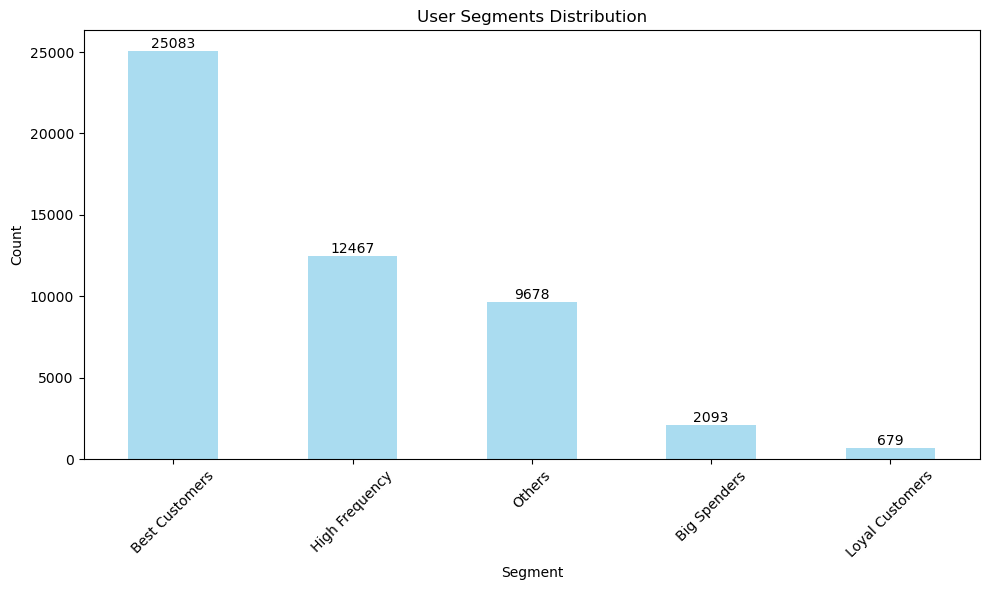

In [22]:
# Convert date columns to datetime
df['FirstTrsDate'] = pd.to_datetime(df['FirstTrsDate'])
df['LastTrsDate'] = pd.to_datetime(df['LastTrsDate'])

# Set current_date to the last date in the dataset
current_date = df['LastTrsDate'].max()

# Calculate Recency (days since last transaction)
df['Recency'] = (current_date - df['LastTrsDate']).dt.days

# Calculate Frequency (total number of transactions)
frequency_columns = [
    'TotalTrsPos', 'CountC2C', 'CountBalance', 'CountPichak', 'CountCharge',
    'CountInternet', 'CountBill', 'CountETC', 'CountCarFinesInq', 'CountTraffic',
    'CountDFlight', 'CountTrain', 'CountBus', 'CountDestCardC2C'
]

df['Frequency'] = df[frequency_columns].sum(axis=1)

# Calculate Monetary (total amount spent)
monetary_columns = [
    'TotalAmountPos', 'AmountC2C', 'CMS_Balance', 'AmountCharge',
    'AmountInternet', 'AmountBill', 'AmountETC', 'AmountCarFinesInq', 'AmountTraffic',
    'AmountDFlight', 'AmountTrain', 'AmountBus', 'AmountC2CasDest'
]

df['Monetary'] = df[monetary_columns].sum(axis=1) / 100000000
df['Monetary'] = df['Monetary'].round(1)  # Round to one decimal place

# Define churn: Recency > 30 days
churn_threshold = 30
df['Churn'] = df['Recency'] > churn_threshold

# RFM Segmentation
quantiles = df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

def rfm_segmentation(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

df['R'] = df['Recency'].apply(rfm_segmentation, args=('Recency', quantiles))
df['F'] = df['Frequency'].apply(rfm_segmentation, args=('Frequency', quantiles))
df['M'] = df['Monetary'].apply(rfm_segmentation, args=('Monetary', quantiles))

# RFM Score
df['RFM_Score'] = df['R'].astype(str) + df['F'].astype(str) + df['M'].astype(str)

# User Segments
def user_segment(row):
    if row['Churn']:
        return 'Churned'
    elif row['RFM_Score'] == '111':
        return 'Best Customers'
    elif row['R'] == 1 and row['F'] == 1:
        return 'Loyal Customers'
    elif row['R'] == 4:
        return 'At Risk'
    elif row['F'] == 4:
        return 'High Frequency'
    elif row['M'] == 4:
        return 'Big Spenders'
    else:
        return 'Others'

df['Segment'] = df.apply(user_segment, axis=1)

# Services interaction
services_columns = [
    'TotalTrsPos', 'CountC2C', 'CountBalance', 'CountPichak', 'CountCharge',
    'CountInternet', 'CountBill', 'CountETC', 'CountCarFinesInq', 'CountTraffic',
    'CountDFlight', 'CountTrain', 'CountBus', 'CountDestCardC2C'
]

# Calculate least and most interacted services
df['Least_Interacted_Service'] = df[services_columns].idxmin(axis=1)
df['Most_Interacted_Service'] = df[services_columns].idxmax(axis=1)



# Explanation of Segments and Their Usage:
explanations = {
    'Best Customers': "These users have high recency, frequency, and monetary scores. They are the most valuable customers.",
    'Loyal Customers': "These users have high recency and frequency scores but not necessarily high monetary scores. They are loyal and frequently use the app.",
    'At Risk': "These users have low recency scores, meaning they haven't transacted recently and are at risk of churning.",
    'High Frequency': "These users have high frequency scores, indicating they transact often but may not spend much per transaction.",
    'Big Spenders': "These users have high monetary scores, indicating they spend a lot per transaction.",
    'Churned': "These users have not transacted in the last 30 days and are considered churned.",
    'Others': "These users do not fit into any of the above categories and have mixed scores."
}

print("\nExplanation of Segments and Their Usage:\n")
for segment, explanation in explanations.items():
    print(f"{segment}: {explanation}\n")

# Visualization of Segments
plt.figure(figsize=(10, 6))
segments_summary.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('User Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the bars
for i, v in enumerate(segments_summary):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

In [23]:
df[['Mobile Key', 'Frequency', 'Monetary', 'RFM_Score', 'Segment', 'Least_Interacted_Service', 'Most_Interacted_Service']]

,Mobile Key,Frequency,Monetary,RFM_Score,Segment,Least_Interacted_Service,Most_Interacted_Service
0,2,18.0,0.1,133,Others,CountPichak,CountBill
1,4,0.0,0.0,111,Best Customers,NaN,NaN
2,6,0.0,0.0,111,Best Customers,NaN,NaN
3,7,363.0,30.2,144,High Frequency,CountETC,CountC2C
4,9,332.0,43.6,144,High Frequency,CountInternet,TotalTrsPos
...,...,...,...,...,...,...,...
49995,125060,0.0,0.0,111,Best Customers,NaN,NaN
49996,125068,109.0,6.6,144,High Frequency,CountBalance,TotalTrsPos
49997,125071,0.0,0.0,111,Best Customers,NaN,NaN
49998,125072,0.0,0.0,111,Best Customers,NaN,NaN


In [24]:
# Calculate potential profit for each least interacted service
profit_margin = 0.09

# Get unique least interacted services, excluding NaN values
unique_services = df['Least_Interacted_Service'].dropna().unique()

# Initialize an empty DataFrame to store discount suggestions
discount_suggestions = pd.DataFrame(columns=['Service', 'Potential_Profit', 'Suggested_Discount'])

# Calculate the potential profit if a user starts using the least interacted service
for service in unique_services:
    users = df[df['Least_Interacted_Service'] == service]
    if service in users.columns:
        potential_profit = users[service].sum() * profit_margin
        # Assume a discount that gives the company 5% profit margin on these services instead of 9%
        suggested_discount = (potential_profit / users.shape[0]) * (4/9)  # Discount to reduce profit margin from 9% to 5%
        new_row = pd.DataFrame({
            'Service': [service],
            'Potential_Profit': [potential_profit],
            'Suggested_Discount': [suggested_discount]
        })
        discount_suggestions = pd.concat([discount_suggestions, new_row], ignore_index=True)

# Display the discount suggestions
print("Discount Suggestions for Least Interacted Services:\n", discount_suggestions)

C:\Users\xre22\AppData\Local\Temp\ipykernel_15432\1215435587.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  discount_suggestions = pd.concat([discount_suggestions, new_row], ignore_index=True)


Discount Suggestions for Least Interacted Services:
              Service  Potential_Profit  Suggested_Discount
0        CountPichak            479.88            0.144891
1           CountETC            239.04            0.081975
2      CountInternet            551.16            0.115656
3       CountBalance            639.63            0.089905
4        TotalTrsPos          25405.20            2.356752
5          CountBill            780.03            0.130380
6           CountC2C            289.71            0.069978
7        CountCharge            863.64            0.141221
8       CountTraffic             19.62            0.045895
9   CountDestCardC2C            874.53            0.181711
10        CountTrain             17.91            0.065785
11  CountCarFinesInq            203.76            0.061564
12          CountBus             21.87            0.056185
13      CountDFlight             12.87            0.065000


In [29]:
# Calculate Recency (days since last transaction)
df['Recency'] = (current_date - df['LastTrsDate']).dt.days

# Define churn: Recency > 30 days
churn_threshold = 30
df['Churn'] = df['Recency'] > churn_threshold

# Customer Lifetime Value (CLV)
# Calculate average monetary value and average customer lifespan (in days)
df['Customer_Lifespan'] = (df['LastTrsDate'] - df['FirstTrsDate']).dt.days
average_monetary_value = df['TotalAmountPos'].mean() / 1_000_000  # Convert to rials
average_customer_lifespan = df['Customer_Lifespan'].mean()

# Assuming a customer generates revenue regularly over their lifespan
CLV = average_monetary_value * (average_customer_lifespan / 365)  # Annualize the lifespan

# Customer Acquisition Cost (CAC)
# Assume fixed marketing and advertising costs in rials
total_marketing_cost = 1_000_000_000  # Example cost in rials
total_customers_acquired = len(df)
CAC = total_marketing_cost / total_customers_acquired

# Return on Investment (ROI)
total_revenue = df['TotalAmountPos'].sum()
total_cost = total_marketing_cost + df['TotalAmountPos'].sum() * (1 - 0.09)  # Adding cost of providing service assuming 9% profit margin
ROI = (total_revenue - total_cost) / total_cost * 100

# Conversion Rate (CR)
# Assume some steps in a funnel: visits, sign-ups, purchases
total_visits = 10000  # Example number of visits
total_signups = total_customers_acquired  # Assuming every customer signed up
total_purchases = len(df)  # Assuming every customer made a purchase

CR_signup = total_signups / total_visits * 100
CR_purchase = total_purchases / total_signups * 100

# Net Promoter Score (NPS)
# Assume some sample data for promoter, passive, and detractor responses
promoters = 70  # Example number of promoters
passives = 20  # Example number of passives
detractors = 10  # Example number of detractors

NPS = (promoters - detractors) / (promoters + passives + detractors) * 100

# Display the results
print(f"Customer Lifetime Value (CLV): {CLV:.2f} rials")
print(f"Customer Acquisition Cost (CAC): {CAC:.2f} rials")
print(f"Return on Investment (ROI): {ROI:.2f}%")
print(f"Conversion Rate (Signup): {CR_signup:.2f}%")
print(f"Conversion Rate (Purchase): {CR_purchase:.2f}%")
print(f"Net Promoter Score (NPS): {NPS:.2f}")

Customer Lifetime Value (CLV): 0.00 rials
Customer Acquisition Cost (CAC): 20000.00 rials
Return on Investment (ROI): 9.85%
Conversion Rate (Signup): 500.00%
Conversion Rate (Purchase): 100.00%
Net Promoter Score (NPS): 60.00


Customer Lifetime Value (CLV): The total revenue a business can reasonably expect from a single customer account throughout their relationship.

Customer Acquisition Cost (CAC): The cost associated with convincing a customer to buy a product/service, including research, marketing, and advertising costs.

Return on Investment (ROI): A performance measure used to evaluate the efficiency of an investment.

Conversion Rate (CR): The percentage of visitors who take a desired action.

Net Promoter Score (NPS): A metric for customer satisfaction and loyalty.


Assumptions:

CLV: We'll use the average monetary value multiplied by the average lifespan of a customer.

CAC: We'll assume some fixed cost for marketing and advertising.

ROI: Calculated as (Total Revenue - Total Cost) / Total Cost.

CR: Assume some steps in a funnel and calculate conversion rates between steps.

NPS: We'll assume some sample data for promoter, passive, and detractor responses.
